Neste projeto de introdução ao Keras, iremos trabalhar com um e-commerce, uma loja de roupas, e toda vez que subirmos uma imagem para a plataforma, teremos que escrever se ela é uma camiseta, bota, saia, ou seja, precisamos classificar esta imagem quando a colocamos no site.

Porém temos um problema: temos 70 mil imagens de diversos tipos de roupas, então imagine rotular cada imagem para essa quantidade de imagens. Usaremos, portanto, uma outra técnica, onde em vez de indicarmos as características delas, usaremos **funções que entenderão essas imagens e extrairão características**, então não mais nomearemos, pois **essas funções é que terão que entender o que se encontra nas imagens**.

A principal diferença aqui é que agora iremos extrair as características das próprias imagens, entendendo o que existe dentro delas com funções, portanto, não iremos mais ensinar um modelo, se tratando de um **aprendizado não supervisionado**.

Iremos utilizar um conjunto de dados de imagens de roupas do próprio Keras chamado *fashion_mnist*.
https://github.com/zalandoresearch/fashion-mnist

In [20]:
# import tensorflow
# Necessário importar o Keras com tensorflow.python para ter o autocomplete
# from tensorflow.python import keras

# Importando diretamente o keras aqui, o autocomplete funciona melhor
import keras
import matplotlib.pyplot as plt

In [21]:
fashion_mnist = keras.datasets.fashion_mnist

# Carrega os dados
# Este dataset retorna duas tuplas de arrays com as imagens
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 60 mil imagens de treino
# A tupla significa: quantidade de imagens, número de linhas e número de colunas das imagens
# 60 mil imagens, de 28 por 28 pixels
train_images.shape

(60000, 28, 28)

In [22]:
# 10 mil imagens de teste
test_images.shape

(10000, 28, 28)

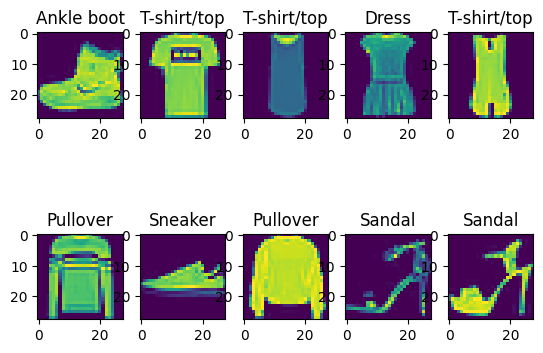

In [23]:
# Temos 10 labels
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

for index in range(0,10):
    # 2 linhas, 5 colunas
    plt.subplot(2,5, index+1)
    plt.imshow(train_images[index])
    plt.title(labels[train_labels[index]]) # Exibe o label

# Exibe a primeira imagem do dataset de treino

### Treinando o modelo

Nosso modelo téra uma **sequência** de 3 fases que envolvem:

- Entrada (Imagens)
- Processamento
- Saída (Classificação de cada roupa)

As imagens são matrizes que contem *28x28 pixels*, após o *achatamento* (**flatten**) das imagens nas camadas, cada matriz de imagem será **transformado em um vetor** com 784 de comprimento (28x28 = 784).

Abaixo criaremos uma camada em um modelo sequêncial de 3 passos.

**Criando a camada 0**

In [24]:
# Criando a sequência do modelo
model = keras.Sequential()

# No primeiro passo, precisamos definir que o formato das entradas (imagens) terão 28x28 pixels
# Em seguida, "achataremos" a imagem de 2 dimensões para apenas uma única dimensão (transformamos em um vetor)
model.add(keras.layers.Flatten(input_shape=(28,28)))